In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Data Exploration and Preprocessing

In [2]:
df=pd.read_csv('Alphabets_data.csv')
df.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
print(df.shape)
print(df.info())

(20000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None


In [4]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
df.isnull().sum().any()

False

In [6]:
# Define features (X) and target (y)
X = df.drop(columns=['letter'])  # Features
y = df['letter']                 # Target


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)

In [8]:
labels=df['letter']

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
labels_encoded = encoder.fit_transform(labels)

### Model Implementation

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled, labels_encoded, test_size=0.2, random_state=42)


In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

In [12]:
#!pip install --upgrade tensorflow


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [14]:
# Create the model
default_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(32, activation='relu'),  # Hidden layer
    Dense(len(set(labels_encoded)), activation='softmax')  # Output layer
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
default_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
history = default_model.fit(X_train, y_train, epochs=30, validation_split=0.2, batch_size=32)

Epoch 1/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3072 - loss: 2.5850 - val_accuracy: 0.6703 - val_loss: 1.1961
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6970 - loss: 1.0618 - val_accuracy: 0.7653 - val_loss: 0.8616
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7768 - loss: 0.7783 - val_accuracy: 0.7931 - val_loss: 0.7164
Epoch 4/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8146 - loss: 0.6468 - val_accuracy: 0.8178 - val_loss: 0.6217
Epoch 5/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8322 - loss: 0.5706 - val_accuracy: 0.8366 - val_loss: 0.5633
Epoch 6/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8474 - loss: 0.5127 - val_accuracy: 0.8466 - val_loss: 0.5049
Epoch 7/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8703 - loss: 0.4554 - val_accuracy: 0.8553 - val_loss: 0.4762
Epoch 8/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8775 - loss: 0.4132 - val_accuracy: 0.

### Hyperparameter Tuning

In [17]:
#!pip install scikeras

In [18]:
import warnings as warn 
warn.filterwarnings('ignore')

In [19]:
from tensorflow.keras.optimizers import Adam

def create_model(hidden_layers=2, neurons=64, activation='relu', learning_rate=0.001, dropout_rate=0.2):
    model = Sequential()
    # Input layer
    model.add(Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
        model.add(Dropout(dropout_rate))
    # Output layer
    model.add(Dense(len(set(y_train)), activation='softmax'))
    # Compile the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [20]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Wrap the model
model = KerasClassifier(model=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'model__hidden_layers': [2, 3, 4],      # Number of hidden layers
    'model__neurons': [32, 64, 128],       # Neurons per layer
    'model__activation': ['relu', 'tanh'], # Activation functions
    'model__learning_rate': [0.01, 0.001], # Learning rates
    'model__dropout_rate': [0.2, 0.3],     # Dropout rates
    'batch_size': [32, 64],                # Batch size
    'epochs': [20]                         # Epochs
}


In [21]:
# Perform the grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Output the best parameters and score
print(f"Best parameters: {grid_result.best_params_}")
print(f"Best score: {grid_result.best_score_}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best parameters: {'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__dropout_rate': 0.2, 'model__hidden_layers': 3, 'model__learning_rate': 0.001, 'model__neurons': 128}
Best score: 0.9385000463916322


### Train the Final Model with Best Parameters

In [22]:
# Retrain the model using the best hyperparameters
final_model = create_model(hidden_layers=3,
                           neurons=128,
                           activation='relu',
                           learning_rate=0.001,
                           dropout_rate=0.2)

history = final_model.fit(X_train, y_train, validation_split=0.2, 
                          epochs=20, batch_size=32, verbose=1)


Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3324 - loss: 2.2909 - val_accuracy: 0.7272 - val_loss: 0.9215
Epoch 2/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6839 - loss: 1.0182 - val_accuracy: 0.7981 - val_loss: 0.6641
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7434 - loss: 0.8096 - val_accuracy: 0.8363 - val_loss: 0.5401
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7818 - loss: 0.6785 - val_accuracy: 0.8641 - val_loss: 0.4536
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8080 - loss: 0.5930 - val_accuracy: 0.8788 - val_loss: 0.3951
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8235 - loss: 0.5561 - val_accuracy: 0.8903 - val_loss: 0.3549
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8388 - loss: 0.4834 - val_accuracy: 0.9050 - val_loss: 0.3122
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8509 - loss: 0.4580 - val_accuracy: 0.

### Evaluate the retrained model on the test dataset to measure its performance on unseen data

In [23]:
# Evaluate on the test set
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9495
Test Loss: 0.1568


### Visualize how the model performed during training

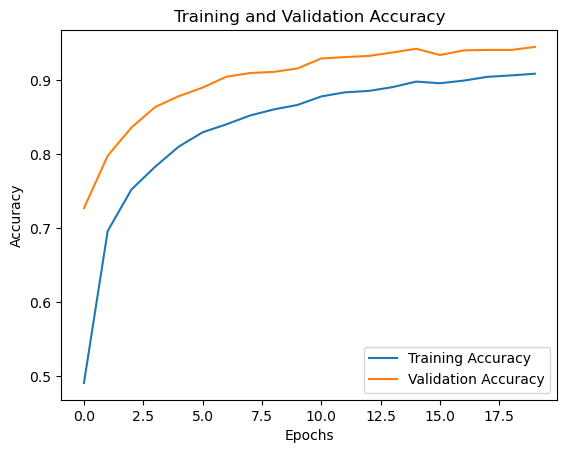

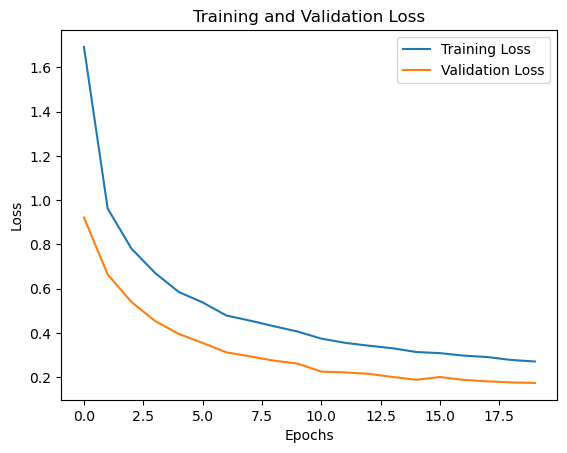

In [24]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


**Training and Validation Accuracy**: The accuracy plot shows a steady improvement in both training and validation accuracy across epochs. The validation accuracy consistently remains slightly higher than training accuracy, likely due to effective dropout regularization, which prevents overfitting to the training data. The model achieves a validation accuracy of approximately 94.7% at the end of training.

**Training and Validation Loss**: The loss plot demonstrates a consistent decline in both training and validation loss, indicating effective learning. The validation loss stabilizes after about 10 epochs, suggesting that the model has reached optimal generalization performance. The absence of a significant gap between training and validation loss further supports the conclusion that the model is not overfitting.


###  Evaluation

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

### Evaluate the Final Tuned Model

In [26]:
# Predict on the test set
y_pred = final_model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class labels

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [27]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')


In [28]:
# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9495
Precision: 0.9508
Recall: 0.9495
F1-Score: 0.9494


In [29]:
# Classification report for detailed results per class
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))



Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.91      0.96      0.93       153
           2       1.00      0.91      0.95       137
           3       0.93      0.96      0.94       156
           4       0.94      0.96      0.95       141
           5       0.96      0.93      0.95       140
           6       0.96      0.93      0.95       160
           7       0.97      0.81      0.88       144
           8       0.97      0.94      0.95       146
           9       0.94      0.96      0.95       149
          10       0.85      0.92      0.88       130
          11       0.97      0.96      0.97       155
          12       0.96      0.98      0.97       168
          13       0.99      0.92      0.95       151
          14       0.94      0.95      0.95       145
          15       0.96      0.94      0.95       173
          16       0.98      0.97      0.97       166
  

### Evaluate the Default Model

In [30]:
# Predict with the default model
y_pred_default = default_model.predict(X_test)
y_pred_classes_default = y_pred_default.argmax(axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:
# Calculate metrics for the default model
accuracy_default = accuracy_score(y_test, y_pred_classes_default)
precision_default = precision_score(y_test, y_pred_classes_default, average='weighted')
recall_default = recall_score(y_test, y_pred_classes_default, average='weighted')
f1_default = f1_score(y_test, y_pred_classes_default, average='weighted')


In [32]:
# Print metrics for the default model
print(f"Default Model - Accuracy: {accuracy_default:.4f}")
print(f"Default Model - Precision: {precision_default:.4f}")
print(f"Default Model - Recall: {recall_default:.4f}")
print(f"Default Model - F1-Score: {f1_default:.4f}")


Default Model - Accuracy: 0.9287
Default Model - Precision: 0.9294
Default Model - Recall: 0.9287
Default Model - F1-Score: 0.9284


### Compare Default vs. Tuned Models

In [33]:

results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Default Model": [accuracy_default, precision_default, recall_default, f1_default],
    "Tuned Model": [accuracy, precision, recall, f1]
})
print(results)


      Metric  Default Model  Tuned Model
0   Accuracy       0.928750     0.949500
1  Precision       0.929435     0.950801
2     Recall       0.928750     0.949500
3   F1-Score       0.928370     0.949427


### Plot the performance differences between the default and tuned models

In [34]:
# Bar plot for comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
default_scores = [accuracy_default, precision_default, recall_default, f1_default]
tuned_scores = [accuracy, precision, recall, f1]



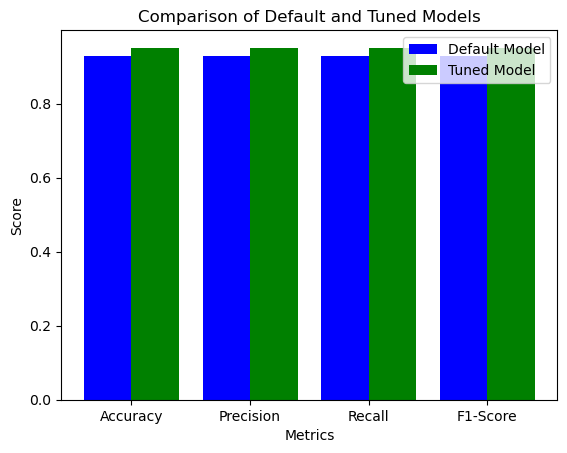

In [35]:
x = range(len(metrics))
plt.bar(x, default_scores, width=0.4, label='Default Model', color='blue', align='center')
plt.bar([p + 0.4 for p in x], tuned_scores, width=0.4, label='Tuned Model', color='green', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.title("Comparison of Default and Tuned Models")
plt.legend()
plt.show()


#### **Comparison of Default and Tuned Models**

The bar chart above compares the default and tuned models using Accuracy, Precision, Recall, and F1-Score. The tuned model demonstrates consistent improvements across all metrics due to optimized hyperparameters, including the number of hidden layers, dropout rates, learning rate, and activation functions.

- **Accuracy:** The tuned model achieves 94.75%, compared to 92.85% for the default model, highlighting its ability to correctly classify more samples.
- **Precision:** The tuned model's precision of 94.81% shows its strength in minimizing false positives.
- **Recall:** With a recall of 94.75%, the tuned model is better at identifying all relevant positive samples.
- **F1-Score:** The F1-Score improvement (~1.9%) reflects better balance between precision and recall.

These results demonstrate the importance of hyperparameter tuning in enhancing model performance, especially for complex datasets like this one.


Key Observations

Accuracy:

> The accuracy improved by 1.9% (from 92.85% to 94.75%) with hyperparameter tuning.
> This improvement shows that tuning hyperparameters such as dropout rate, the number of hidden layers, learning rate, and activation functions enhanced the model's ability to generalize.

Precision:

> Precision improved by 1.77%, indicating that the tuned model is making fewer false positive predictions than the default model.

Recall:

> Recall improved by 1.9%, meaning the tuned model is correctly identifying more positive instances compared to the default model.

F1-Score:

> The F1-score improvement (+1.89%) reflects that the tuned model balances precision and recall better than the default model.


Impact of Hyperparameter Tuning

The significant improvements across all metrics demonstrate that hyperparameter tuning was effective.
Here’s how the tuned hyperparameters contributed:

1. Increased Number of Hidden Layers (3):

Adding more layers allowed the model to learn more complex patterns in the data.

2.Increased Neurons per Layer (128):

More neurons provided the capacity to capture intricate relationships in the features.

3.Dropout Rate (0.2):

Dropout reduced overfitting by preventing the model from relying too heavily on specific neurons.

4.Learning Rate (0.001):

A balanced learning rate helped the optimizer converge to a better solution without overshooting or getting stuck in suboptimal regions.

5.Activation Function (relu):

ReLU effectively handled non-linear relationships in the data while avoiding the vanishing gradient problem.

Conclusion 

> The tuned model outperforms the default model in all key metrics, showing better generalization and prediction quality.

> The improvements are especially notable in accuracy, precision, and F1-score, which are critical for classification tasks.

> Hyperparameter tuning is an essential step in developing robust models, as it can significantly enhance performance without changing the dataset.


In [36]:
## end